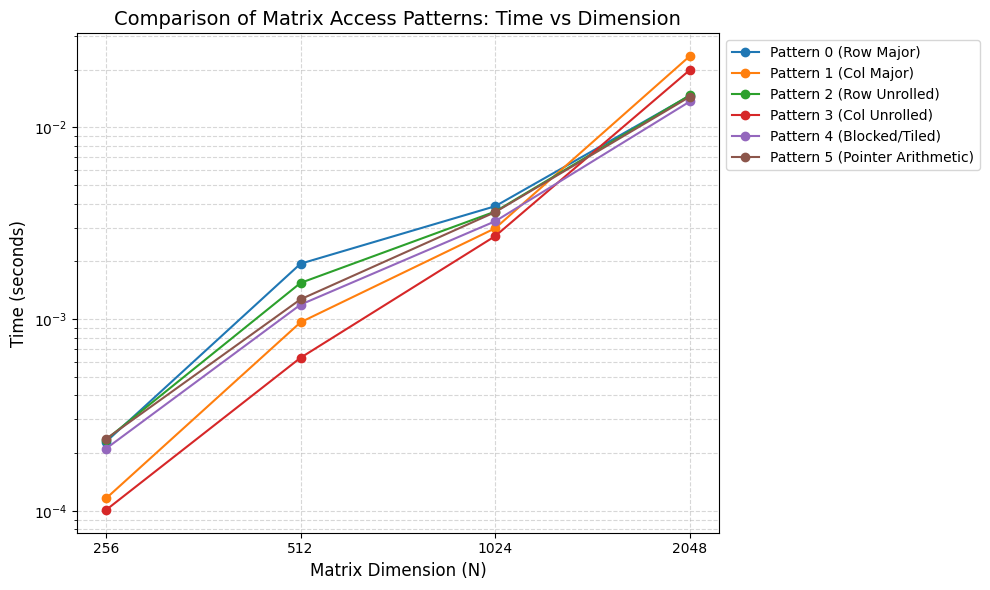

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('final_results.csv')

# 2. Setup the plot
plt.figure(figsize=(10, 6))

# 3. Plot each pattern
# Patterns are: 0=Row, 1=Col, 2=Row Unrolled, 3=Col Unrolled, 4=Blocked, 5=Pointer
patterns_map = {
    0: "Pattern 0 (Row Major)",
    1: "Pattern 1 (Col Major)",
    2: "Pattern 2 (Row Unrolled)",
    3: "Pattern 3 (Col Unrolled)",
    4: "Pattern 4 (Blocked/Tiled)",
    5: "Pattern 5 (Pointer Arithmetic)"
}

for pattern_id in sorted(df['pattern'].unique()):
    subset = df[df['pattern'] == pattern_id]
    plt.plot(subset['N'], subset['sec'], marker='o', label=patterns_map.get(pattern_id, f"Pattern {pattern_id}"))

# 4. Labelling and Formatting
plt.title('Comparison of Matrix Access Patterns: Time vs Dimension', fontsize=14)
plt.xlabel('Matrix Dimension (N)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)

# Use log-log scale to observe the O(N^2) complexity clearly
plt.xscale('log', base=2)
plt.yscale('log')

# Set specific X-axis ticks for the dimensions used
plt.xticks(df['N'].unique(), labels=df['N'].unique())

plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# 5. Save and Show
plt.savefig('comparison_plot.png')
plt.show()